# Проект 4. Компьютер говорит "НЕТ".

## Файлы проекта
- [my_decision.ipynb.ipynb](my_decision.ipynb.ipynb) - ноутбук с основным решением
- [README.md](README.md) - описание проекта

In [3]:
import pandas as pd 
import numpy as np 

In [5]:
!ls -la 

total 16
drwxr-xr-x   6 Oleg  staff   192 11 май 21:15 .
drwxr-xr-x  22 Oleg  staff   704 11 май 20:17 ..
-rw-r--r--   1 Oleg  staff    66 11 май 20:45 README.md
drwxr-xr-x   2 Oleg  staff    64 11 май 21:15 additionally
drwxr-xr-x   3 Oleg  staff    96 11 май 21:15 datasets
-rw-r--r--   1 Oleg  staff  2132 11 май 20:48 my_decision.ipynb


In [10]:
df = pd.read_csv('./datasets/train.csv')
df

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,GRD,F,45,N,N,0,0,3,1,2,17000,N,0
73795,76821,SCH,M,41,Y,Y,0,0,1,2,2,70000,N,0
73796,103695,SCH,M,31,N,N,0,0,4,2,3,45000,N,0
73797,861,SCH,F,29,N,N,0,1,3,1,3,13000,N,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [12]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve


Посмотрим на данные:

- client_id	идентификатор клиента
- education	уровень образования
- sex	пол заёмщика
- age	возраст заёмщика
- car	флаг наличия автомобиля
- car_type	флаг автомобиля-иномарки
- decline_app_cnt	количество отказанных прошлых заявок
- good_work	флаг наличия «хорошей» работы
- bki_request_cnt	количество запросов в БКИ
- home_address	категоризатор домашнего адреса
- work_address	категоризатор рабочего адреса
- income	доход заёмщика
- foreign_passport	наличие загранпаспорта
- default	наличие дефолта

<AxesSubplot:>

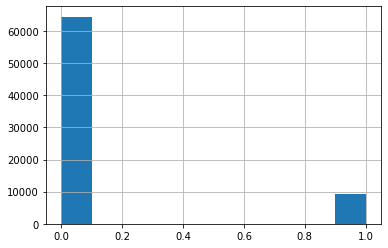

In [14]:
df['default'].hist()

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [16]:
df.isnull().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

<AxesSubplot:>

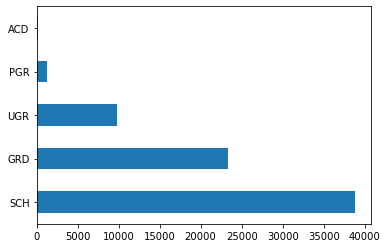

In [20]:
df['education'].value_counts().plot.barh()

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

client_id           0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
bki_request_cnt     0
home_address        0
work_address        0
income              0
foreign_passport    0
default             0
dtype: int64

In [30]:
df['income'].value_counts()
df['bki_request_cnt'].value_counts()
df['home_address'].value_counts()

2    39777
1    32462
3     1253
Name: home_address, dtype: int64

https://lms.skillfactory.ru/assets/courseware/v1/59694217c40479cc0a6d9f4c7b0c3c3e/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/dst-score-13.png




/Users/Oleg/.conda/envs/SkillFactory/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


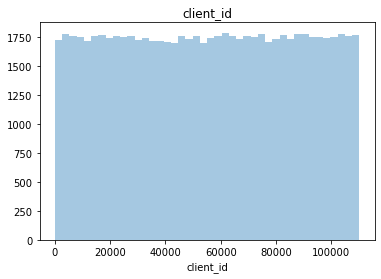

TypeError: '>' not supported between instances of 'str' and 'int'

In [33]:
num_cols = df.columns

for i in num_cols:
    plt.figure()
    sns.distplot(df[i][df[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()